Ce Notebook présente la préparation du jeu de données Kaggle "1.8 Million Wildfires" afin de prédire la classes de feu. 
Dans cette version, le nombre de catégories des feux a été limité à trois:
- Catégorie 1: feux de taille inférieur à 1 acre (0.4 ha), la moitié de la surface d'un terrain de foorball
- Catégorie 2: feux avec une taille comprise entre 1 et 100 acres (=40 ha, soit la taille d'un cours de golf)
- Catégorie 3: feux avec une taille supérieure à 100 acres

## I - Préparation du jeu de données

### Importation des packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier    
from sklearn import model_selection
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### Sélection des variables et préparation du jeu de données

In [2]:
# Import des données et suppression des variables "inutiles"
df = pd.read_csv('C:\\Users\\mlant\\Desktop\\fire_data.csv',encoding = 'ISO-8859-1')

df = df.drop(labels=['objectid','fpa_id', 'local_fire_report_id','local_incident_id','fire_code','fire_name',
                     'ics_209_incident_number', 'ics_209_name', 'mtbs_id','mtbs_fire_name','complex_name',
                    'discovery_time','county','fips_code','shape', "owner_code", 'fips_name',
                    'nwcg_reporting_unit_id', 'source_system_type','source_system','nwcg_reporting_agency',
                    'nwcg_reporting_unit_name',
                    'source_reporting_unit','source_reporting_unit_name','discovery_doy','stat_cause_code',
                    'cont_date','cont_doy','cont_time'], axis=1)


df['discovery_date'] = pd.to_datetime(df['discovery_date'] - pd.Timestamp(0).to_julian_date(), unit='D')

# Ajout de la dénomination "longue" des états
states_short = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'RI']

states = ['Alaska','Alabama','Arkansas','Arizona','California','Colorado','Connecticut','District of Columbia','Delaware',
          'Florida','Georgia','Hawaii','Iowa','Idaho','Illinois','Indiana','Kansas','Kentucky','Louisiana','Massachusetts',
          'Maryland','Maine','Michigan','Minnesota','Missouri','Mississippi','Montana','North Carolina','North Dakota',
          'Nebraska','New Hampshire','New Jersey','New Mexico','Nevada','New York','Ohio','Oklahoma','Oregon',
          'Pennsylvania', "Puerto Rico", 'South Carolina','South Dakota','Tennessee','Texas','Utah', 'Virginia','Vermont',
          'Washington','Wisconsin','West Virginia','Wyoming','Rhode Island']

df["states_long"] = df["state"]
df["states_long"] = df["states_long"].replace(to_replace = states_short, value = states)

# Ajout de la densité de population de l'Etat
dict_dens = {'Alabama': 95.4, 'Alaska': 1.3, 'Arizona': 58.3, 'Arkansas': 56.9, 'California': 246.1, 'Colorado': 50.8, 'Connecticut': 742.6, 'Delaware': 475.1, 'District of Columbia': 4361, 'Florida': 364.6, 'Georgia': 173.7, 'Hawaii': 218.6, 'Idaho': 19.5, 'Illinois': 232.2, 'Indiana': 183.4, 'Iowa': 55.3, 'Kansas': 35.4, 'Kentucky': 111.3, 'Louisiana': 107.1, 'Maine': 43.1, 'Maryland': 610.8, 'Massachusetts': 858, 'Michigan': 175, 'Minnesota': 68.1, 'Mississippi': 63.7, 'Missouri': 87.9, 'Montana': 7, 'Nebraska': 24.3, 'Nevada': 25.4, 'New Hampshire': 147.8, 'New Jersey': 1210.1, 'New Mexico': 17.2, 'New York': 417, 'North Carolina': 202.6, 'North Dakota': 10.5, 'Ohio': 283.2, 'Oklahoma': 56.1, 'Oregon': 40.9, 'Pennsylvania': 285.5, 'Puerto Rico': 835, 'Rhode Island': 1017, 'South Carolina': 158.8, 'South Dakota': 11.1, 'Tennessee': 157.5, 'Texas': 101.2, 'Utah': 35.3, 'Vermont': 68, 'Virginia': 209.2, 'Washington': 104.9, 'West Virginia': 77.1, 'Wisconsin': 106, 'Wyoming': 6}
df['state_density']= df['states_long']
df['state_density']= df['states_long'].replace(dict_dens)

# Ajout de la variable "couverture forestière" par état
dict_forestcover = {'Maine':89.46,'New Hampshire':84.32,'American Samoa':80.84,'Northern Mariana Islands':80.37,'West Virginia':79.01,'Vermont':77.81,'Alabama':70.57,'South Carolina':68.19,'Georgia':67.28,'Mississippi':65.07,'Virginia':62.93,'New York':62.88,'Massachusetts':60.57,'North Carolina':59.73,'Pennsylvania':58.60,'United States Virgin Islands Virgin Islands (U.S.)':57.16,'Arkansas':56.31,'Puerto Rico':55.62,'Michigan':55.62,'Connecticut':55.24,'Rhode Island':54.38,'Louisiana':53.20,'Tennessee':52.83,'Guam':52.82,'Washington':52.74,'Florida':50.68,'Kentucky':49.35,'Wisconsin':48.98,'Oregon':48.51,'Hawaii':42.53,'New Jersey':41.72,'Idaho':40.55,'Maryland':39.36,'Texas':37.33,'Missouri':35.16,'Alaska':35.16,'Utah':34.48,'Colorado':34.42,'Minnesota':34.08,'District of Columbia':33.90,'California':32.71,'New Mexico':31.99,'Ohio':30.92,'Oklahoma':28.80,'Montana':27.45,'Delaware':27.26,'Arizona':25.64,'Indiana':21.06,'Wyoming':18.42,'Nevada':15.89,'Illinois':13.64,'Iowa':9.43,'Kansas':4.78,'South Dakota':3.93,'Nebraska':3.20,'North Dakota':1.72}
df['forest_coverage']= df['states_long']
df['forest_coverage']= df['states_long'].replace(dict_forestcover)

# Ajout ddu nombre de casernes de pompier par état
dict_firestations_count = {'AK': 354,'AL': 1544,'AR': 1352,'AZ': 566,'CA': 3150,'CO': 858,'CT': 569,'DC': 35,'DE': 87,'FL': 1718,'GA': 1748,'HI': 106,'IA': 880,'ID': 402,'IL': 1840,'IN': 1251,'KS': 983,'KY': 1184,'LA': 1081,'MA': 760,'MD': 509,'ME': 567,'MI': 1444,'MN': 977,'MO': 1543,'MS': 1043,'MT': 460,'NC': 1904,'ND': 341,'NE': 539,'NH': 327,'NJ': 1277,'NM': 620,'NV': 262,'NY': 2654,'OH': 1824,'OK': 1189,'OR': 718,'PA': 2613,'PR': 94,'RI': 161,'SC': 1134,'SD': 383,'TN': 1414,'TX': 2886,'UT': 391,'VA': 1009,'VI': 13,'VT': 279,'WA': 1280,'WI': 1082,'WV': 559,'WY': 220}
df['firestations_count']= df['state'].replace(dict_firestations_count)

# Transformation du mois en variable catégorielle
month_dict = {1:'jan', 2:'fev',3:'mars',4:'avril',5:'mai',6:'juin',7:'juill',8:'aout',9:'sept',
              10:'oct',11:'nov',12:'dec'}
df['month'] = pd.DatetimeIndex(df['discovery_date']).month
df['month'] = df['month'].replace(month_dict)

# Regroupement des causes
cause_dict = {'Lightning':'Natural', 'Debris Burning':'Infrastructure', 'Miscellaneous':'Miscellaneous',
              'Campfire':'Human','Equipment Use':'Human', 'Arson':'Human', 'Children':'Human', 'Railroad':'Infrastructure',
              'Smoking':'Human','Powerline':'Infrastructure', 'Structure':'Infrastructure',
              'Fireworks':'Human', 'Missing/Undefined':'Miscellaneous'}

df['stat_cause_descr'] = df['stat_cause_descr'].replace(cause_dict)

# Fusion du df avec les données météos récupérées
df_full = pd.read_csv('C:\\Users\\mlant\\Desktop\\Projet Formation\\df_full.csv')
df = df.merge(df_full, left_on='fod_id', right_on = 'fod_id', how = 'left')

# Fusion du df avec la distance de la caserne de pompier la plus proche
df_firestation = pd.read_csv('C:\\Users\\mlant\\Desktop\\Projet formation\\Données météo\\closest_firestation_distance.csv')
df = df.merge(df_firestation, left_on='fod_id',right_on='fod_id', how = 'left')

# Suppression de certaines colonnes et des lignes avec des valeurs manquantes
df = df[(df['daily_avg_temp'] != 0.0) & (df['daily_min_temp'] != 0.0) & (df['daily_max_temp'] != 0.0)]
df = df[df['daily_avg_temp'].notnull()]
df = df[df['days_collected'] > 45]
df = df.drop(labels = ['states_long','state','Unnamed: 0', 'fod_id', 'discovery_date', 'days_collected', 'daily_pres', 'daily_snow','daily_wspd','daily_wdir','daily_wpgt','daily_tsun'], axis = 1)
df = df.dropna()

In [3]:
#vérification valeurs nulles avec nouvelle variable forest_coverage
df.forest_coverage.isna().sum()

0

In [4]:
df.loc[df['fire_size']<1, 'new_cat']=1
df.loc[(df['fire_size']>=1)&(df['fire_size']<100), 'new_cat']=2
df.loc[(df['fire_size']>=100)&(df['fire_size']<1000000), 'new_cat']=3

In [5]:
df=df.drop('fire_size_class', axis=1)

In [6]:
df=df.drop('fire_size', axis=1)

In [7]:
df.new_cat=df.new_cat.astype('int')

In [8]:
# Transformation des coordonnées en variable catégorielle
import pygeohash as pgh
create_geohash = lambda row: pgh.encode(row['latitude'], row['longitude'], 2)
df["geohash"] = df[["latitude", "longitude"]].apply(create_geohash, axis=1)

# MTransformation de la variable "year" en catégoriel
df['fire_year'] = df['fire_year'].astype(str)

# Transformation des variables catégorielles
df_categorical = df.select_dtypes(include=["object"])
df_categorical = pd.get_dummies(df_categorical, dummy_na=False, drop_first=True)

# Fusion avec le df
df = pd.concat([df, df_categorical], axis=1)
df = df.select_dtypes(exclude=["object"])
df = df.drop(columns=['latitude','longitude'])

### Séparation jeu d'entrainement et jeu de test, Normalisation

In [9]:
data = df.drop("new_cat", axis = 1)
target = df["new_cat"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 66, stratify = target )

In [11]:
# On normalise nos données :
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## II -  Entraînement de modèles de classification: SGD, RF, DT, XGBoost

### SGD

In [12]:
# Définition des modèles
sgd = SGDClassifier()
# Entraînement du modèle
sgd.fit(X_train_scaled, y_train)
print("test score du sgd : {}".format(sgd.score(X_test_scaled, y_test)))
print("train score du sgd : {}".format(sgd.score(X_train_scaled, y_train)))

# Prédiction du modèle
y_pred = sgd.predict(X_test)

test score du sgd : 0.6639143224989751
train score du sgd : 0.6638873504851366


In [13]:
# Matrice de correlation
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite       1    2      3
Classe réelle                     
1               120624  331  14150
2               120144  267  14506
3                 5665   47   2332

In [14]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      0.89      0.63    135105
           2       0.41      0.00      0.00    134917
           3       0.08      0.29      0.12      8044

    accuracy                           0.44    278066
   macro avg       0.33      0.39      0.25    278066
weighted avg       0.44      0.44      0.31    278066



### RandomForestClassifier

In [15]:
rf = RandomForestClassifier()
# Entraînement du modèle
rf.fit(X_train, y_train)
print("test score du rf : {}".format(rf.score(X_test, y_test)))
print("train score du rf : {}".format(rf.score(X_train, y_train)))

# Prédiction du modèle
y_pred = rf.predict(X_test)

test score du rf : 0.7039335984981983
train score du rf : 0.9971148935864147


In [16]:
# Matrice de correlation
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite       1      2     3
Classe réelle                      
1               100414  34110   581
2                39007  94474  1436
3                 2480   4712   852

In [17]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.74      0.72    135105
           2       0.71      0.70      0.70    134917
           3       0.30      0.11      0.16      8044

    accuracy                           0.70    278066
   macro avg       0.57      0.52      0.53    278066
weighted avg       0.70      0.70      0.70    278066



### DecisionTreeClassifier

In [18]:
dt = DecisionTreeClassifier()
# Entraînement du modèle
dt.fit(X_train, y_train)
print("test score du dt : {}".format(dt.score(X_test, y_test)))
print("train score du dt : {}".format(dt.score(X_train, y_train)))

# Prédiction du modèle
y_pred = dt.predict(X_test)

test score du dt : 0.6432681449727763
train score du dt : 0.9971373702646135


In [19]:
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite      1      2     3
Classe réelle                     
1               89906  42528  2671
2               42864  87596  4457
3                2410   4265  1369

In [20]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.67      0.67    135105
           2       0.65      0.65      0.65    134917
           3       0.16      0.17      0.17      8044

    accuracy                           0.64    278066
   macro avg       0.49      0.49      0.49    278066
weighted avg       0.64      0.64      0.64    278066



### XG Boost

In [21]:
#Préparation donnée pour XG Boost
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xg = le.fit_transform(y_train) 
y_test_xg = le.fit_transform(y_test) 

#Entrainement du modèle XGBoost
!pip install xgboost
import xgboost as xgb

xg = xgb.XGBClassifier()
xg.fit(X_train_scaled, y_train_xg)
print("test score du xg : {}".format(xg.score(X_test_scaled, y_test_xg)))
print("train score du xg : {}".format(xg.score(X_train_scaled, y_train_xg)))

# Prédiction du modèle
y_pred = xg.predict(X_test_scaled)

# Rapport de classification
print(classification_report(y_test_xg, y_pred))

cm = pd.crosstab(y_test_xg, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

test score du xg : 0.7123272892047212
train score du xg : 0.7181946012817101
              precision    recall  f1-score   support

           0       0.72      0.74      0.73    135105
           1       0.71      0.73      0.72    134917
           2       0.52      0.04      0.08      8044

    accuracy                           0.71    278066
   macro avg       0.65      0.50      0.51    278066
weighted avg       0.71      0.71      0.70    278066



Classe prédite      0      1    2
Classe réelle                    
0               99850  35176   79
1               36798  97892  227
2                2731   4981  332

Les modèles donnant un meilleurs score pour le jeu test sont: XgBoost et RandomForest
Cependant les classes minoritaires des feux de classes importantes sont mal détectés.
Nous allons utiliser le module imblearn pour améliorer la détection de classes minoritaires.

## III -  Classification pour jeux de données déséquilibrées

Il y a 2 familles de méthodes pour les jeux de données déséquilibrés:

1/ L'oversampling => ici l'algorithme est trop long, pas d'obtention de résultats

2/ L'undersampling => celui-ci a été appliqué avec les algorithmes ayant donné les meilleurs résultats

### XG Boost

In [15]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

#Modification échantillonnage
X_train_ru,y_train_ru= RandomUnderSampler().fit_resample(X_train_scaled,y_train)

#Préparation donnée pour XG Boost
dic_ca= {1:0, 2:1, 3:2}
y_train_ru= [dic_ca[cat] for cat in y_train_ru]
y_test_ru= [dic_ca[cat] for cat in y_test] 

#Entrainement du modèle XGBoost
!pip install xgboost
import xgboost as xgb

from time import time
t0 = time()

xgu = xgb.XGBClassifier()
xgu.fit(X_train_ru, y_train_ru)
print("test score : {}".format(round(xgu.score(X_test_scaled, y_test_ru),3)))
print("train score : {}".format(round(xgu.score(X_train_ru, y_train_ru),3)))

t1 = time() -t0
print("durée:",round(t1,2))

# Re-"labellisation" des catégories de 1 à 4
dic_ca_rev= {0:1, 1:2, 2:3}
y_train_ru= [dic_ca_rev[cat] for cat in y_train_ru]
y_test_ru= [dic_ca_rev[cat] for cat in y_test_ru]

# Prédiction du modèle
y_pred = xgu.predict(X_test_scaled)
y_pred= [dic_ca_rev[cat] for cat in y_pred]

# Rapport de classification
print(classification_report(y_test_ru, y_pred))
cm = pd.crosstab(y_test_ru, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

test score : 0.602
train score : 0.683
durée: 17.77
              precision    recall  f1-score   support

           1       0.72      0.65      0.68    135105
           2       0.72      0.55      0.63    134917
           3       0.10      0.66      0.18      8044

    accuracy                           0.60    278066
   macro avg       0.51      0.62      0.49    278066
weighted avg       0.70      0.60      0.64    278066



Classe prédite      1      2      3
Classe réelle                      
1               87318  28004  19783
2               32633  74793  27491
3                1224   1515   5305

In [16]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

#Modification échantillonnage
X_ru,y_ru= RandomUnderSampler().fit_resample(X_train_scaled,y_train)

t0 = time()

#Entrainement du modèle un algorythme Random Forest Classifier
rfu = RandomForestClassifier()
rfu.fit(X_ru, y_ru)
print("test score : {}".format(round(rfu.score(X_test_scaled, y_test),3)))
print("train score : {}".format(round(rfu.score(X_ru, y_ru),3)))
      
t1 = time() -t0
print("durée:",round(t1,2))

# Prédiction du modèle
y_pred = rfu.predict(X_test_scaled)

# Rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

test score : 0.601
train score : 1.0
durée: 34.24
              precision    recall  f1-score   support

           1       0.71      0.66      0.68    135105
           2       0.71      0.54      0.62    134917
           3       0.10      0.66      0.18      8044

    accuracy                           0.60    278066
   macro avg       0.51      0.62      0.49    278066
weighted avg       0.70      0.60      0.64    278066



Les résultats sont fortement améliorés pour la classe 3 minoritaire.

## GridSearch en combinaison avec Imblearn

In [11]:
!pip install xgboost
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

#Modification échantillonnage
X_train_ru,y_train_ru= RandomUnderSampler().fit_resample(X_train_scaled,y_train)

#Préparation données pour XG Boost
dic_ca= {1:0, 2:1, 3:2}
y_train_xgru= [dic_ca[cat] for cat in y_train_ru]
y_test_xgru= [dic_ca[cat] for cat in y_test]

# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 0.5, 1, 1.5, 2, 5,10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=4, cv=skf.split(X_train_ru, y_train_xgru), verbose=3, random_state=1001 )

random_search.fit(X_train_ru, y_train_xgru)

print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[11:25:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



 Best hyperparameters:
{'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 0.6}


In [28]:
from xgboost import XGBClassifier

#Préparation donnée pour XG Boost
dic_ca= {1:0, 2:1, 3:2}
y_train_xgru= [dic_ca[cat] for cat in y_train_ru]
y_test_xgru= [dic_ca[cat] for cat in y_test] 

xgb = XGBClassifier(subsample= 0.6, min_child_weight= 1, max_depth= 4, gamma= 5, colsample_bytree= 0.6)
xgb.fit(X_train_ru, y_train_xgru)
print("test score : {}".format(round(xgb.score(X_test_scaled, y_test_xgru),2)))
print("train score : {}".format(round(xgb.score(X_train_ru, y_train_xgru),2)))

# Re-"labellisation" des catégories de 1 à 7
dic_ca_rev= {0:1, 1:2, 2:3}
y_train_ru= [dic_ca_rev[cat] for cat in y_train_xgru]
y_test_ru= [dic_ca_rev[cat] for cat in y_test_xgru]

# Prédiction du modèle
y_pred = xgb.predict(X_test_scaled)
y_pred= [dic_ca_rev[cat] for cat in y_pred]

# Rapport de classification
print(classification_report(y_test_ru, y_pred))
cm = pd.crosstab(y_test_ru, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

test score : 0.59
train score : 0.62
              precision    recall  f1-score   support

           1       0.71      0.63      0.67    135105
           2       0.71      0.55      0.62    134917
           3       0.09      0.65      0.16      8044

    accuracy                           0.59    278066
   macro avg       0.51      0.61      0.48    278066
weighted avg       0.69      0.59      0.63    278066



Classe prédite      1      2      3
Classe réelle                      
1               84861  28252  21992
2               32816  73748  28353
3                1299   1534   5211

L'optimisation des paramètres avec GridSearch n'a pas permis d'obtenir un meilleur résultat qu'avec les paramètres par défaut, qui sont les suivants: {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 6, 'gamma': 0, 'colsample_bytree': 1}. Le surapprentissage a été cependant réduit.

### V - Interprétation du modèle¶

Le modèle XGBoost est donc le modèle sélectionné dans ce projet. Cependant, il est considéré par beaucoup comme une 'black box' inexplicable.

Nous allons utiliser le package Shap pour tenter de comprendre comment le modèle a fonctionné et quelles variables ont eu le plus de poids.

In [18]:
!pip install xgboost
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler

#Modification échantillonnage
X_train_ru,y_train_ru= RandomUnderSampler().fit_resample(X_train_scaled,y_train)


!pip install shap
import xgboost as xgb

#Conversion des jeux de données en DMatrix
dtrain = xgb.DMatrix(X_train_ru, y_train_ru)
dtest = xgb.DMatrix(X_test_scaled)

# xgboost params
params = {'subsample': 0.6, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 0.6}

# Entrainement du modèle
model = xgb.train(params, dtrain)
pred = model.predict(dtest)

Nous allons créer la matrice des valeurs SHAP pour chaque individu et chaque variable. Chaque ligne correspond à la différence entre la sortie du modèle pour un individu et la valeur attendue de la sortie du modèle (l'Expected value). Cette différence nous aidera à expliquer pourquoi le modèle est enclin à prédire le résultat d'une classe spécifique.

In [19]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values).head(7)

Expected Value: 1.9575697


0         1         2         3    4         5         6         7    \
0  0.092803  0.023017  0.082593  0.003675  0.0  0.041459  0.000037  0.000175   
1 -0.186799 -0.031001  0.054896  0.002705  0.0 -0.013157  0.000041  0.000175   
2 -0.251857 -0.017891 -0.012738  0.002811  0.0 -0.005856  0.000041  0.000471   
3 -0.038944 -0.098315 -0.063590 -0.003505  0.0 -0.030624  0.000041 -0.000873   
4  0.128117  0.034529  0.111968 -0.003527  0.0 -0.025011  0.000041 -0.021813   
5  0.111837  0.036023 -0.004563 -0.003721  0.0 -0.025756  0.000041 -0.000325   
6  0.136108  0.027358  0.106097  0.003233  0.0  0.008509  0.000041  0.000471   

   8         9    ...       102  103  104       105  106       107  108  109  \
0  0.0  0.000565  ... -0.002569  0.0  0.0  0.001927  0.0  0.006007  0.0  0.0   
1  0.0  0.003640  ... -0.004076  0.0  0.0  0.000718  0.0  0.012432  0.0  0.0   
2  0.0  0.001945  ... -0.007436  0.0  0.0  0.000718  0.0  0.010286  0.0  0.0   
3  0.0  0.005364  ... -0.002394  0.0  0.0  0.001927  0.0  0.005713  0.0  0.0   
4  0.0 -0.000288  ... -0.002570  0.0  0.0  0.001927  0.0  0.005329  0.0  0.0   
5  0.0  0.001456  ... -0.003570  0.0  0.0  0.001927  0.0  0.008693  0.0  0.0   
6  0.0  0.000839  ... -0.004253  0.0  0.0  0.001927  0.0  0.005704  0.0  0.0   

   110  111  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  
5  0.0  0.0  
6  0.0  0.0  

[7 rows x 112 columns]

Affichons les features importances obtenues avec SHAP

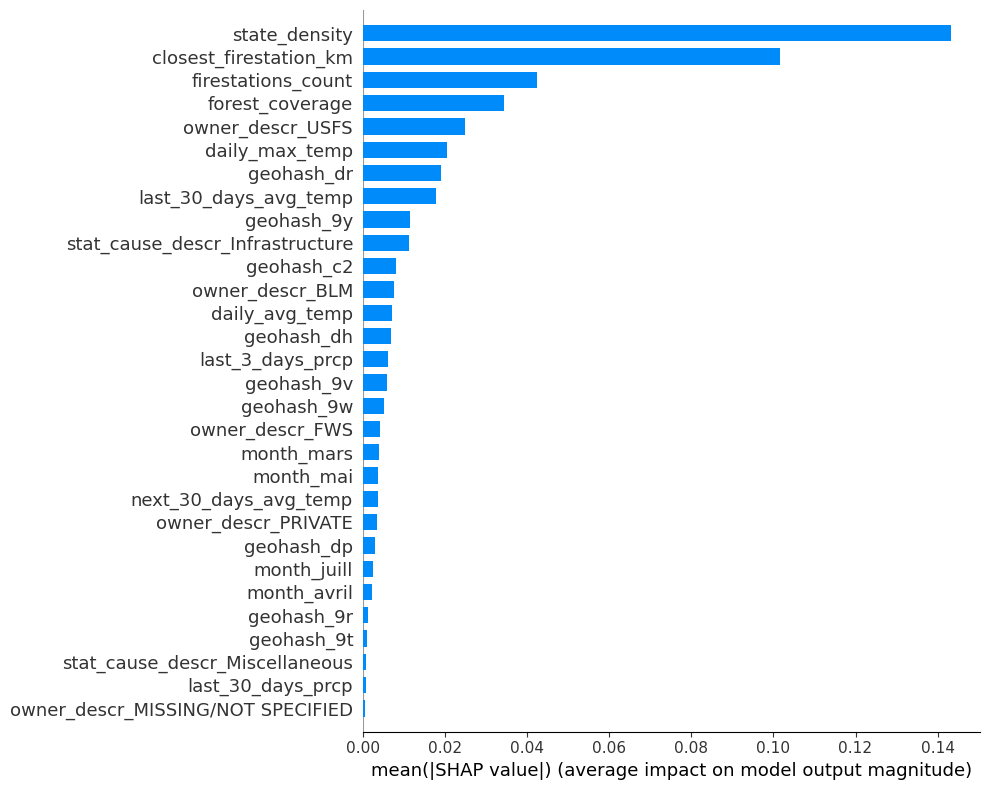

In [20]:
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(10,8),max_display=30)

Dans le cas des trois catégories, la feature state_density se distingue nettement. 

Nous pouvons analyser les dépendances entre variables, par exemple entre la variable de la distance de la caserne de pompiers la plus proche et la densité de population.

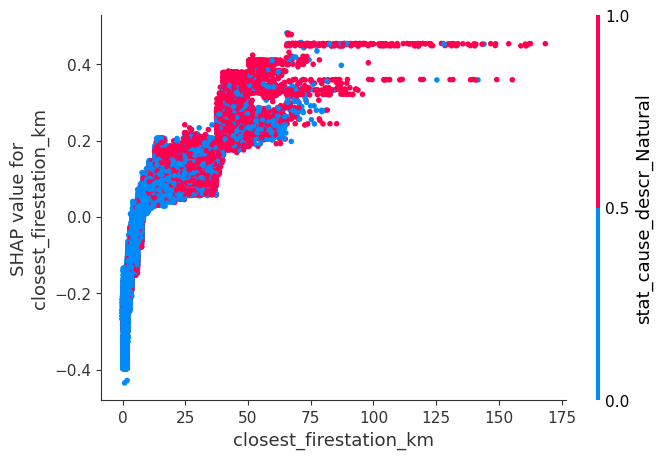

In [21]:
shap.dependence_plot("closest_firestation_km", shap_values, X_test, interaction_index= "stat_cause_descr_Natural")

Nous pouvons ensuite étudier la dépendance entre le mois de mai et les températures du dernier mois.

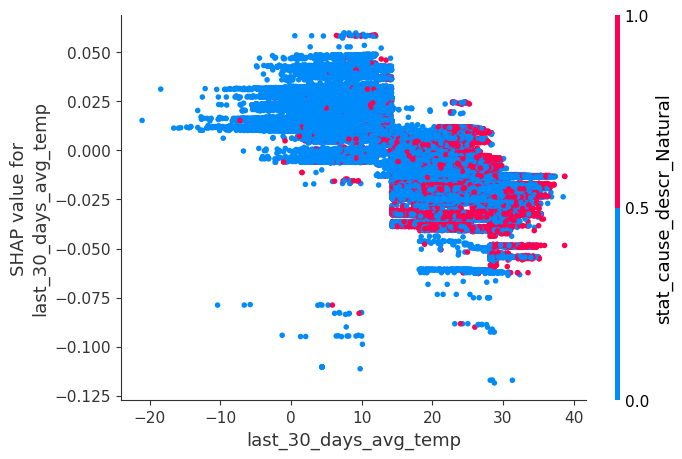

In [22]:
shap.dependence_plot("last_30_days_avg_temp", shap_values, X_test, interaction_index= "stat_cause_descr_Natural")

On peut observer que les causes naturelles sont corrélées davantage avec des températures comprises entre 18 et 35°C.  

In [23]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[3,:], X_test.iloc[3,:])

L'un des principaux avantages du SHAP est qu'il permet de construire des graphiques globaux interactifs qui peuvent visualiser et expliquer plusieurs prédictions à la fois. Ici, nous visualisons les décisions de prédictions du modèle pour les 1000 premiers échantillons de données de test.

In [24]:
shap.force_plot(explainer.expected_value, shap_values[:1000], X_test[:1000])